1DSfM time mean:    76.42418565748001
1DSfM time median:  72.8545179367
1DSfMHuber time mean:    76.69370412822
1DSfMHuber time median:  74.92651188375001
BaselineHuber time mean:    87.86987307070999
BaselineHuber time median:  84.26347994804999
Baseline time mean:    84.89732377528999
Baseline time median:  80.90079498290001


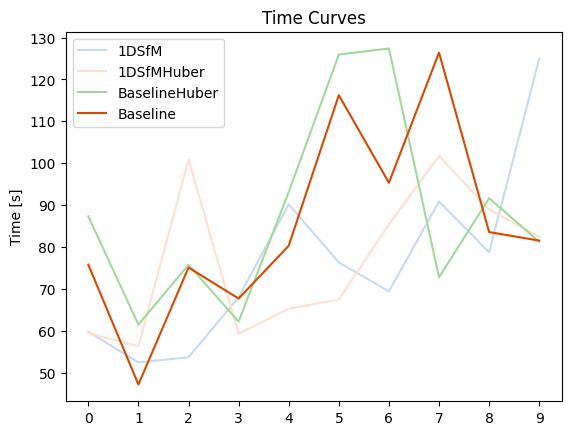

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
def visualization_time():
    """
    Reads time measurements from a file and plots time curves for each experiment.
    """

    time_file_path = '/home/liutao/Project/Homework3_dzj/sfm/sfm_init/results/time.txt'
    all_times = {}
    mean_times = {}
    median_times = {}

    with open(time_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' ')
            name = parts[0]
            times = [float(time_str) for time_str in parts[1:]]
            all_times[name] = times
            mean_times[name] = np.mean(times)
            median_times[name] = np.median(times)
            print(f'{name} time mean:   ', np.mean(times))
            print(f'{name} time median: ', np.median(times))

    fig, ax = plt.subplots()
    blue_palette = ['#c6dbef', '#fee0d2', '#a1d99b', '#d94801']

    i = 0
    for name, times in all_times.items():
        ax.plot(times, label=name, color=blue_palette[i])
        i+=1

    ax.legend()
    ax.set_ylabel('Time [s]')
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.set_title('Time Curves')
    plt.show()

visualization_time()

1DSfM mean:    1106.7398373807778
1DSfM median:  0.9593309796030055
1DSfMHuber mean:    10005.036101200067
1DSfMHuber median:  0.2867589202994828
Baseline mean:    982372.660131846
Baseline median:  1.7394691441359933
BaselineHuber mean:    1717713.5863511083
BaselineHuber median:  0.34544930174580557


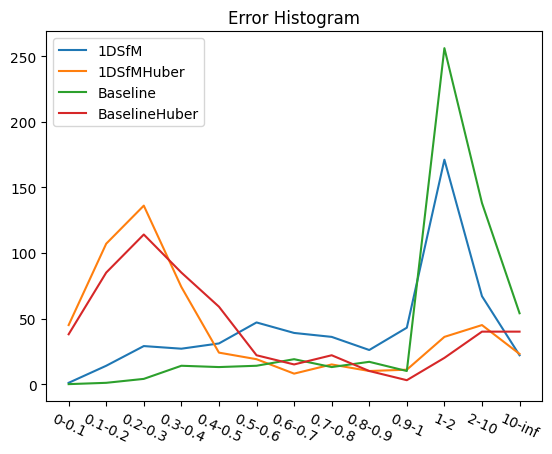

In [24]:
def visualization_error():
    """
    Reads error data from files, computes statistics, and plots histograms for each experiment.
    """
    results_dir = '/home/liutao/Project/Homework3_dzj/sfm/sfm_init/results/'
    experiment_names = ['1DSfM', '1DSfMHuber', 'Baseline', 'BaselineHuber']
    error_data = {}

    for experiment in experiment_names:
        error_file = os.path.join(results_dir, experiment, 'trans_solution_gt_error.txt')
        errors = np.loadtxt(error_file)
        error_data[experiment] = errors
        print(f'{experiment} mean:   ', np.mean(errors))
        print(f'{experiment} median: ', np.median(errors))

    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 10, np.inf]
    histogram_data = {}

    for experiment in experiment_names:
        counts, _ = np.histogram(error_data[experiment], bins=bins)
        histogram_data[experiment] = counts

    bin_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

    fig, ax = plt.subplots()
    x_positions = np.arange(len(bin_labels))

    for i, (experiment, counts) in enumerate(histogram_data.items()):
        ax.plot(counts, label=experiment)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(bin_labels)
    ax.legend()
    plt.xticks(rotation=-25)
    ax.set_title('Error Histogram')
    plt.show()
    #plt.savefig(os.path.join(results_dir, 'error_histogram.png'))

visualization_error()